In [165]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math
import scipy.optimize as sci_op 

1 (a) Make plot of the pressure profiles of 1 and 6 M_sun stars at ZAMS. 
Overplot pressure profiles given by n = 3 and n = 1.5 polytropes (scaled appropriately to roughly match the
MESA model). Mark the regions of each star that is best approximated by each model.

In [2]:
sixM = pd.read_csv('6M_profile.data',delim_whitespace=True, skiprows=5)

oneM = pd.read_csv('1M_profile.data', delim_whitespace=True, skiprows=5)

In [4]:
sixM_10

,zone,mass,logR,logT,logRho,logP,x_mass_fraction_H,y_mass_fraction_He,z_mass_fraction_metals,logdq,...,brunt_N2_dimensionless,brunt_N_dimensionless,brunt_frequency,brunt_B,brunt_nu,log_brunt_nu,log_lamb_Sl1,log_lamb_Sl2,log_lamb_Sl3,log_lamb_Sl10
0,1,6.000000e+00,2.733094,3.515616,-8.683787,2.630756,0.690580,2.893067e-01,0.020113,-12.000000,...,6.813863e+00,2.610338,0.007601,0.000000,0.087970,-1.055665,-2.479845,-2.241285,-2.090770,-1.609664
1,2,6.000000e+00,2.733094,3.515616,-8.683787,2.630756,0.690580,2.893067e-01,0.020113,-11.455923,...,6.813863e+00,2.610338,0.007601,0.000000,0.087970,-1.055665,-2.479845,-2.241285,-2.090770,-1.609664
2,3,6.000000e+00,2.733094,3.515616,-8.683787,2.630756,0.690580,2.893067e-01,0.020113,-10.985750,...,4.847383e+01,6.962315,0.020272,1.159044,0.234635,-0.629608,-2.479845,-2.241285,-2.090770,-1.609664
3,4,6.000000e+00,2.733094,3.515616,-8.683787,2.630756,0.690580,2.893067e-01,0.020113,-10.480381,...,1.956269e+02,13.986668,0.040725,5.253065,0.471360,-0.326647,-2.479845,-2.241285,-2.090770,-1.609664
4,5,6.000000e+00,2.733094,3.515616,-8.683786,2.630756,0.690579,2.893079e-01,0.020113,-9.989620,...,3.586670e+02,18.938505,0.055144,9.789086,0.638240,-0.195016,-2.479845,-2.241285,-2.090770,-1.609664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,1927,7.500219e-06,-4.055855,8.200108,7.191733,24.197840,0.000000,1.505490e-10,1.000000,-6.204107,...,6.815653e+08,26106.805342,76.016149,0.012412,879.816537,2.944392,7.146958,7.385519,7.536034,8.017140
1927,1928,3.750110e-06,-4.156217,8.200097,7.191810,24.197949,0.000000,1.509038e-10,1.000000,-6.505137,...,4.293023e+08,20719.610292,60.330054,0.012441,698.264515,2.844020,7.247338,7.485899,7.636414,8.117520
1928,1929,1.875055e-06,-4.256572,8.200091,7.191859,24.198018,0.000000,1.511278e-10,1.000000,-6.806167,...,2.704201e+08,16444.455428,47.881928,0.012458,554.188980,2.743658,7.347705,7.586266,7.736780,8.217886
1929,1930,9.375273e-07,-4.356922,8.200086,7.191889,24.198062,0.000000,1.512690e-10,1.000000,-7.107197,...,1.703434e+08,13051.565086,38.002724,0.012469,439.846341,2.643301,7.448063,7.686623,7.837138,8.318244


In [3]:
logRho_6M = sixM['logRho']
R_6M = sixM['radius'] #or logR
logP_6M = sixM['logP']

In [4]:
logRho_1M = oneM['logRho']
R_1M = oneM['radius']
logP_1M = oneM['logP']

In [5]:
#output an array of P(r) for an input rho(r)
def polytropeLog (n, logRho, logK=1):
    # takes in n, logK, logRho & returns logP 
    #log form of the polytrope eq: logP = logK + logRho*(n+1)/n
    
    logP = logK + logRho*((n+1)/n)
    
    return logP

In [6]:
poly3_1M = polytropeLog(3, logRho_1M, 14.5)
poly15_1M = polytropeLog(1.5, logRho_1M, 14)

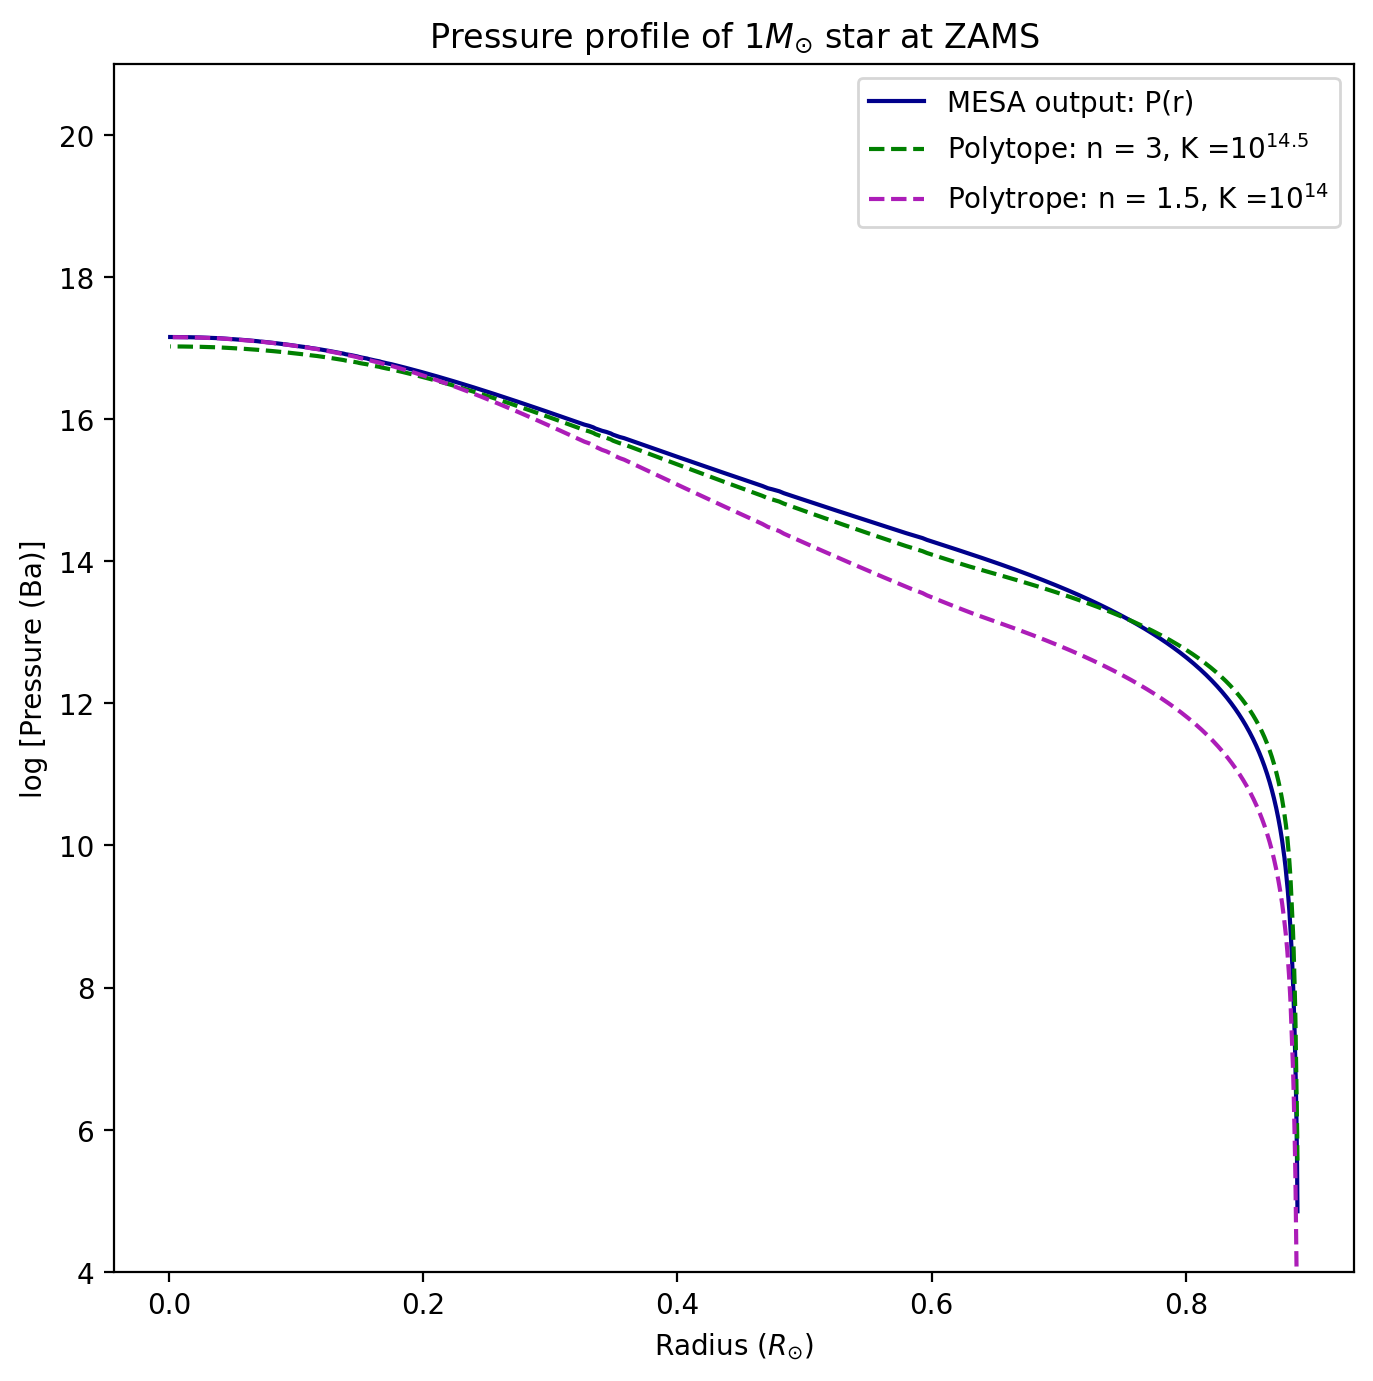

In [37]:
fig, ax = plt.subplots(figsize=(8,8), dpi=200)
ax.plot(R_1M,logP_1M, color = 'darkblue', label = 'MESA output: P(r)')

ax.plot(R_1M, poly3_1M, color = 'green', label = r'Polytope: n = 3, K =$10^{14.5}$', linestyle = '--')

ax.plot(R_1M, poly15_1M, color = 'xkcd:barney', label = r'Polytrope: n = 1.5, K =$10^{14}$', linestyle = '--')


plt.xlabel('Radius ($R_{\odot}$)')
plt.ylabel('log [Pressure (Ba)]')

plt.ylim(4,21)

plt.title('Pressure profile of 1$M_{\odot}$ star at ZAMS')
plt.legend()
plt.savefig('PvsR_1SolarM.jpg', bbox_inches='tight')


# # to draw the box
# box1 = dict(boxstyle='round', facecolor='wheat', alpha=0.15)
# ax.text(0.03,0.85, '                             \n\n\n\n',\
#         transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox = box1)

# ax.text(0.8,0.6, '                \n\n\n\n\n\n\n\n\n\n',\
#         transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox = box1)



plt.show()

In [30]:
poly3_6M = polytropeLog(3, logRho_6M, 15)
poly15_6M = polytropeLog(1.5, logRho_6M, 14.8)

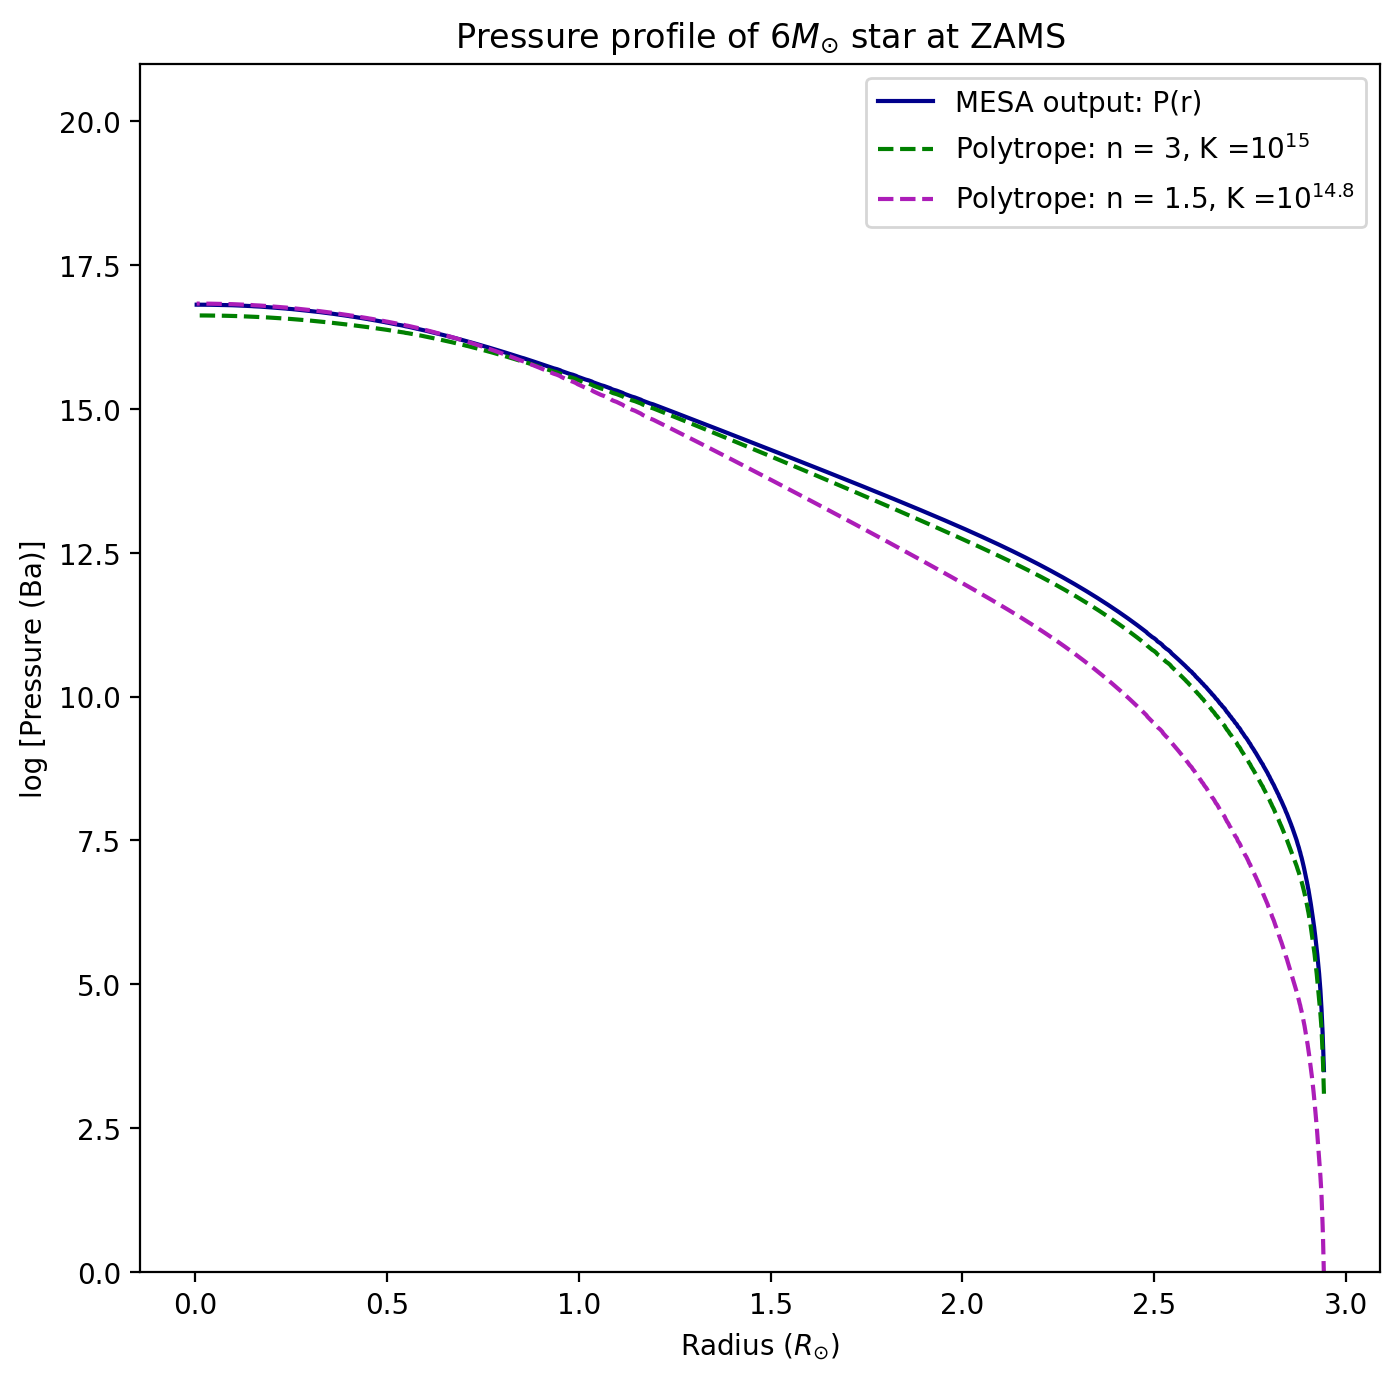

In [36]:
fig, ax = plt.subplots(figsize=(8,8), dpi=200)
ax.plot(R_6M,logP_6M, color = 'darkblue', label = 'MESA output: P(r)')

ax.plot(R_6M, poly3_6M, color = 'green', label = r'Polytrope: n = 3, K =$10^{15}$', linestyle='--')

ax.plot(R_6M, poly15_6M, color = 'xkcd:barney', label = r'Polytrope: n = 1.5, K =$10^{14.8}$', linestyle='--')



plt.xlabel('Radius ($R_{\odot}$)')
plt.ylabel('log [Pressure (Ba)]')

plt.ylim(0,21)

plt.title('Pressure profile of 6$M_{\odot}$ star at ZAMS')
plt.legend()
plt.savefig('PvsR_6SolarM.jpg', bbox_inches='tight')



# to draw the box
# box1 = dict(boxstyle='round', facecolor='wheat', alpha=0.15)
# ax.text(0.07,0.8, '                                      \n\n\n\n',\
#         transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox = box1)

# ax.text(0.8,0.5, '                \n\n\n\n\n\n\n\n\n',\
#         transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox = box1)



plt.show()

1 (a) If you do not find either model to be good for a large fraction of either star, what is the best
polytropic index for that region (overplot it)? What can you infer about the energy transport
and structure of each star in different regions?

In [42]:
polyFit_1M = polytropeLog(2.9, logRho_1M, 14.6)

In [44]:
# fig, ax = plt.subplots(figsize=(8,8), dpi=200)
# ax.plot(R_1M,logP_1M, color = 'darkblue', label = 'MESA output: P(r)')

# ax.plot(R_1M, polyFit_1M, color = 'xkcd:saffron', label = r'Polytrope: n = 2.3, K =$10^{14.6}$', linestyle = '--')
# ax.plot(R_1M, poly15_1M, color = 'xkcd:barney', label = r'Polytrope: n = 1.5, K =$10^{14}$', linestyle = '--')



# plt.xlabel('Radius ($R_{\odot}$)')
# plt.ylabel('log [Pressure (Ba)]')

# plt.ylim(0,18)

# plt.title('Pressure profile of 1$M_{\odot}$ ZAMS star with polytrope fits')
# plt.legend()
# plt.savefig('PvsR_1SolarM_polyFitN.jpg', bbox_inches='tight')



# # ax.annotate('Overdensity', xy=(0.5,3), xytext=(2, 13), \
# #             arrowprops=dict(facecolor='black', shrink=0.1, width=2.5), size=16)

# #to draw the box
# # box1 = dict(boxstyle='round', facecolor='mediumpurple', alpha=0.1)
# # ax.text(0.027,0.95, '                                 \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n',\
# #         transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox = box1)

# # box2 = dict(boxstyle='round', facecolor='green', alpha=0.1)
# # ax.text(0.88,0.57, '          \n\n\n\n\n\n\n\n\n\n\n\n\n\n',\
# #         transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox = box2)




# plt.show()

In [27]:
polyFit_6M = polytropeLog(3.9, logRho_6M, 15)

In [45]:
# fig, ax = plt.subplots(figsize=(8,8), dpi=200)
# ax.plot(R_6M,logP_6M, color = 'darkblue', label = 'MESA output: P(r)')

# ax.plot(R_6M, polyFit_6M, color = 'xkcd:mango', label = r'Polytrope: n = 3.9, K =$10^{15}$', linestyle = '--')
# ax.plot(R_6M, poly15_6M, color = 'xkcd:barney', label = r'Polytrope: n = 1.5, K =$10^{14.8}$', linestyle='--')




# plt.xlabel('Radius ($R_{\odot}$)')
# plt.ylabel('log [Pressure (Ba)]')

# plt.ylim(0,18)

# plt.title('Pressure profile of 6$M_{\odot}$ ZAMS star with polytrope fits')
# plt.legend()

# plt.savefig('PvsR_6SolarM_polyFitN.jpg', bbox_inches='tight')


# # ax.annotate('Overdensity', xy=(0.5,3), xytext=(2, 13), \
# #             arrowprops=dict(facecolor='black', shrink=0.1, width=2.5), size=16)

# #to draw the box
# # box1 = dict(boxstyle='round', facecolor='mediumpurple', alpha=0.1)
# # ax.text(0.027,0.95, '                                 \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n',\
# #         transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox = box1)

# # box2 = dict(boxstyle='round', facecolor='green', alpha=0.1)
# # ax.text(0.88,0.57, '          \n\n\n\n\n\n\n\n\n\n\n\n\n\n',\
# #         transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox = box2)




# plt.show()

1 (b) Compute d log T /d log P as a function of radius and plot it as a function of stellar radius. Describe the physical implications and relate this to your results in (a).

In [46]:
#define a function that takes two arrays and calculates their derivatives
def calculateDrvtv (dep, indep):
    #assume that dep & indep are arrays of the same length
    #dep is the dependent variable -- goes d{here}/dx
    #indep is the independent variable -- goes dy/d{here}
    length = len(dep)
    
    drvtv = [None]*length
    for i in range(length-1):
        num = dep[i+1] - dep[i]
        denom = indep[i+1] - indep[i]
        step = num/denom
        
        drvtv[i] = step
        
        
    return drvtv      

In [47]:
logT_6M = sixM['logT']

logT_1M = oneM['logT']

In [48]:
dlogTdlogP_6M = calculateDrvtv(logT_6M, logP_6M)
dlogTdlogP_1M = calculateDrvtv(logT_1M, logP_1M)

In [49]:
def n_gamma (arrow, n=None, gamma=None):
    #function to flip back and forth between n and gamma
    #arrow can be 'get n' or 'get g'
    if arrow == 'get g':
        gamma = (n+1)/n
        return gamma
    
    if arrow == 'get n':
        n = 1/(gamma-1)
        return n

In [50]:
#get the gamma values that correspond to n=3 and n=1.5
g_n3 = n_gamma('get g', n=3)
g_n15 = n_gamma('get g', n=1.5)

In [51]:
#use gamma values from ^ to find the convection thresholds
convec_thresh_n3 = (g_n3 - 1)/g_n3
convec_thresh_n15 = (g_n15 - 1)/g_n15

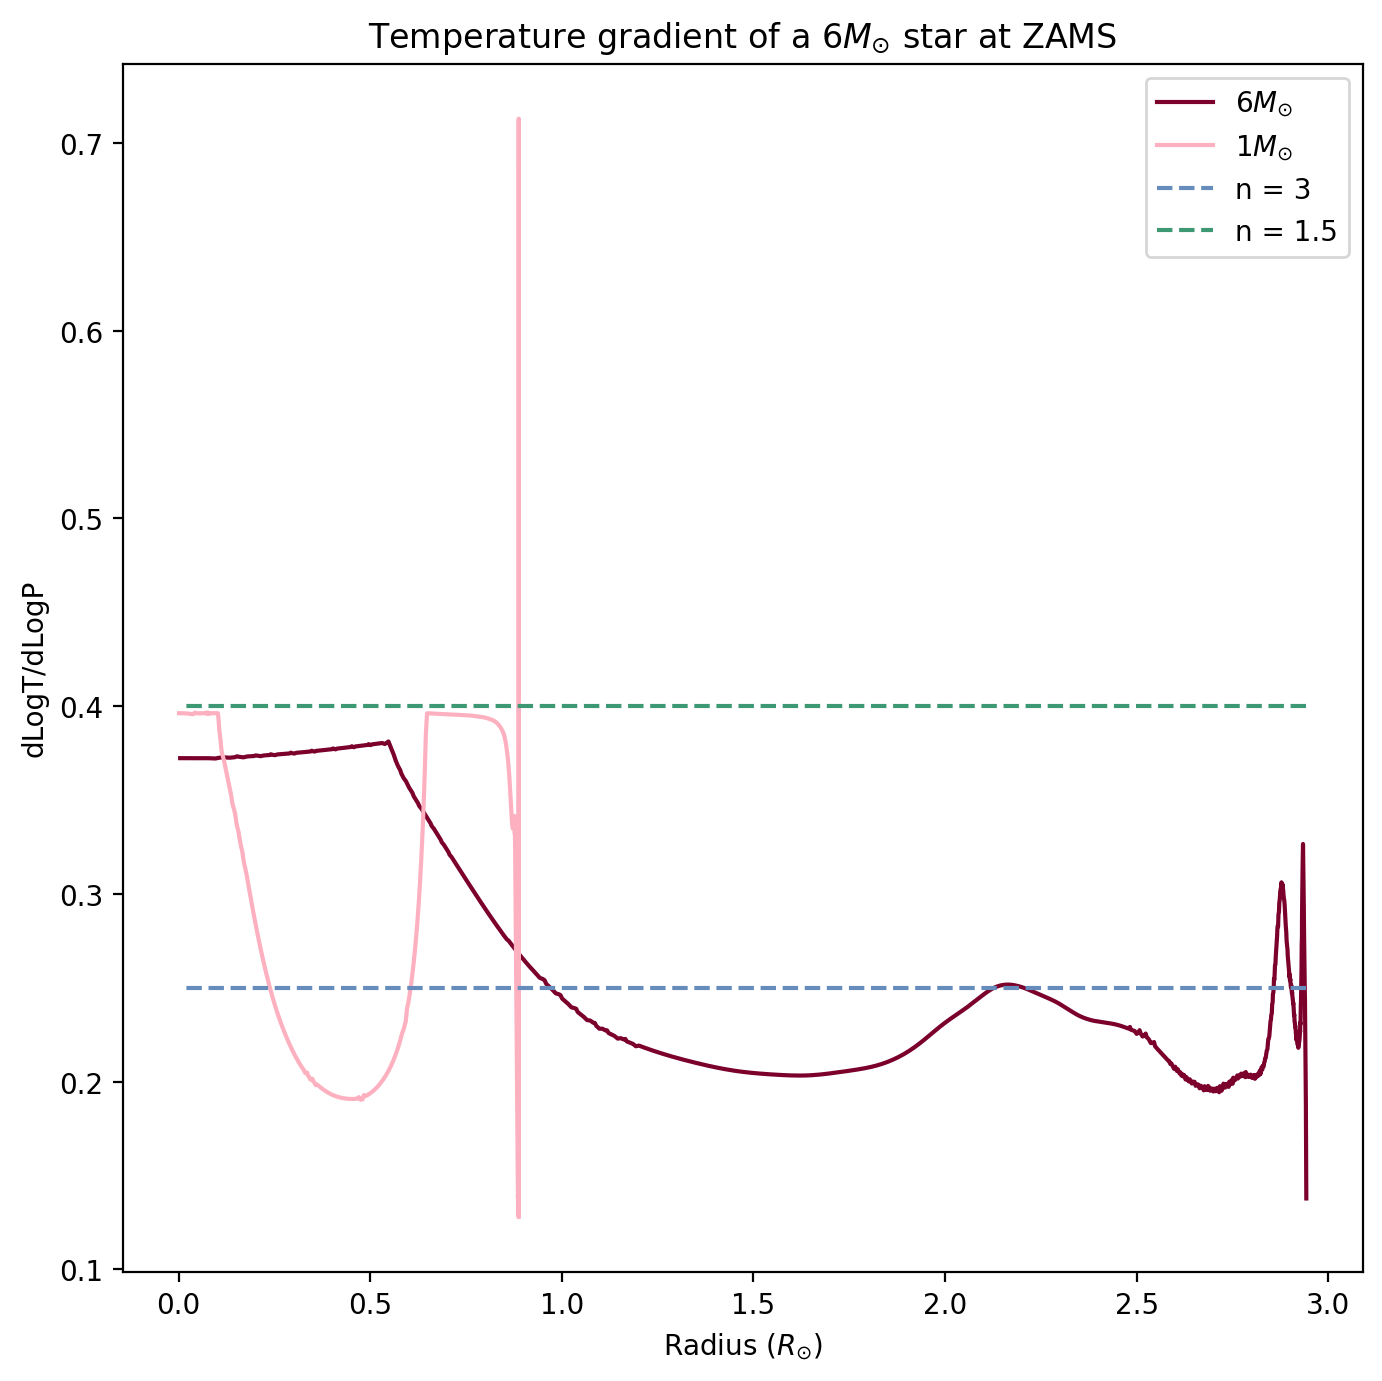

In [166]:
fig, ax = plt.subplots(figsize=(8,8), dpi=200)
ax.plot(R_6M,dlogTdlogP_6M, color = 'xkcd:bordeaux', label = '6$M_{\odot}$')
ax.plot(R_1M,dlogTdlogP_1M, color = 'xkcd:soft pink', label = '1$M_{\odot}$')


line_n3 = [convec_thresh_n3]*len(R_6M)
line_n15 = [convec_thresh_n15]*len(R_6M)

ax.plot(R_6M, line_n3, color = 'xkcd:faded blue', linestyle='--', label = 'n = 3')
ax.plot(R_6M, line_n15, color = 'xkcd:ocean green', linestyle='--', label = 'n = 1.5')


plt.xlabel('Radius ($R_{\odot}$)')
plt.ylabel('dLogT/dLogP')
# plt.xscale('log')

plt.title('Temperature gradient of a 6$M_{\odot}$ star at ZAMS')
plt.legend()

plt.savefig('dlogTdlogP.jpg', bbox_inches='tight')

plt.show()

In [119]:
(1/0.203)-1

3.9261083743842358

In [122]:
(1/0.372)-1

1.6881720430107525

In [167]:
# fig, ax = plt.subplots(figsize=(8,8), dpi=200)
# ax.plot(R_1M,dlogTdlogP_1M, color = 'xkcd:rose pink', label = '1$M_{\odot}$')

# line_n3 = [convec_thresh_n3]*len(R_1M)
# line_n15 = [convec_thresh_n15]*len(R_1M)

# ax.plot(R_1M, line_n3, color = 'xkcd:faded blue', linestyle='--', label = 'n = 3')
# ax.plot(R_1M, line_n15, color = 'xkcd:ocean green', linestyle='--', label = 'n = 1.5')

# line_convec_1=[0.22]*




# plt.xlabel('Radius ($R_{\odot}$)')
# plt.ylabel('dLogT/dLogP')

# plt.title(r'Temperature gradient of a 1$M_{\odot}$ star at ZAMS')
# plt.savefig('dlogTdlogP_1M.jpg', bbox_inches='tight')
# plt.legend()

# plt.show()

In [660]:
(1/0.19)-1

4.2631578947368425

In [661]:
(1/0.4)-1

1.5

2. Select the subset of all stars within 70 pc from Gaia DR2 with good colors (S/N in the blue and red bands ≥5) and excellent parallaxes (S/N > 20). When outputting the file, include columns for the luminosity, effective temperature, and radius.


the query: 
SELECT gaia_source.source_id,gaia_source.parallax,gaia_source.phot_g_mean_mag,gaia_source.bp_rp,gaia_source.teff_val,gaia_source.radius_val,gaia_source.radius_percentile_lower,gaia_source.radius_percentile_upper,gaia_source.lum_val,gaia_source.lum_percentile_lower,gaia_source.lum_percentile_upper FROM gaiadr2.gaia_source WHERE (gaiadr2.gaia_source.parallax_over_error>=20 AND gaiadr2.gaia_source.phot_bp_mean_flux_over_error>=5 AND gaiadr2.gaia_source.phot_rp_mean_flux_over_error>=5 AND gaiadr2.gaia_source.parallax>=15)

In [64]:
query = pd.read_csv('gaiaData_hw2.csv', sep = ',')

(a) Plot:
-- effective temperature as a function of BP−RP color, and 
--luminosity as a function of MG.

In [486]:
for i in query.columns:
    print(i)

source_id
parallax
phot_g_mean_mag
bp_rp
teff_val
radius_val
radius_percentile_lower
radius_percentile_upper
lum_val
lum_percentile_lower
lum_percentile_upper


In [65]:
def removeNan (orig_sources, cols):    
    #assume orig_sources is a pandas dataframe
    #and cols is a list with the string headers for the columns
    #from which to drop Nan values
    temp = orig_sources
    for col_header in cols:
        new = temp.dropna(subset=[col_header])
#         temp = new
               
    return new

In [66]:
orig_query = query
query = removeNan(orig_query,['radius_val','lum_val'])

In [67]:
#pull out relevant values
Teff = query['teff_val']
appMagG = query['phot_g_mean_mag']
BpRp = query['bp_rp']
lum = query['lum_val']
par = query['parallax']
R = query['radius_val']

2 (a) Plot effective temperature as a function of BP −RP color and luminosity as a function of M_G. For each, determine a function that relates the observable (BP−RP or MG) into the physical quantity (effective temperature or luminosity) listed by Gaia.

In [68]:
#define a function to convert between parallax & flux
def parDist (arrow, d = None, p = None):
    #arrow = 'get p' converts from d -> p
    #arrow = 'get d' converts p -> d
    
    #assume p is in milliarcsec
    
    if arrow == 'get p':
        p = (1/d)*1000
        return p
    
    elif arrow == 'get d':
        d = 1000/p
        return d      

In [69]:
#define a function to convert between apparent magnitude, absolute
#magnitude, and distance

def distanceModulus (arrow, app = None, Abs = None, d = None):
    #arrow = 'get app' converts from Abs -> app using d
    #arrow = 'get Abs' converts from app -> Abs using d
    #arrow = 'get d' calculates d using app & Abs mags
    
    #assume d is in parsec
    log = np.log10
    
    if arrow == 'get app':
        app = (5*log(d/10)) + Abs
        return app
        
    elif arrow == 'get Abs':
        Abs = app - (5*log(d/10))
        return Abs
            
    elif arrow == 'get d':
        exp = 1 + (app - Abs)/5
        d = 10**(exp)
        return d

In [70]:
#use the above functions + data from the query
#to calculate distances & absolute magnitudes
dist = parDist('get d', p = par)
Gmag = distanceModulus ('get Abs', app = appMagG, d = dist)

In [71]:
#make a function that approximates the relationship between Teff & color
#initial guess : based off wien's law, lambda = K/T & T = L/lambda, so a K/x function
modelT = (3000)*(BpRp**(-1))

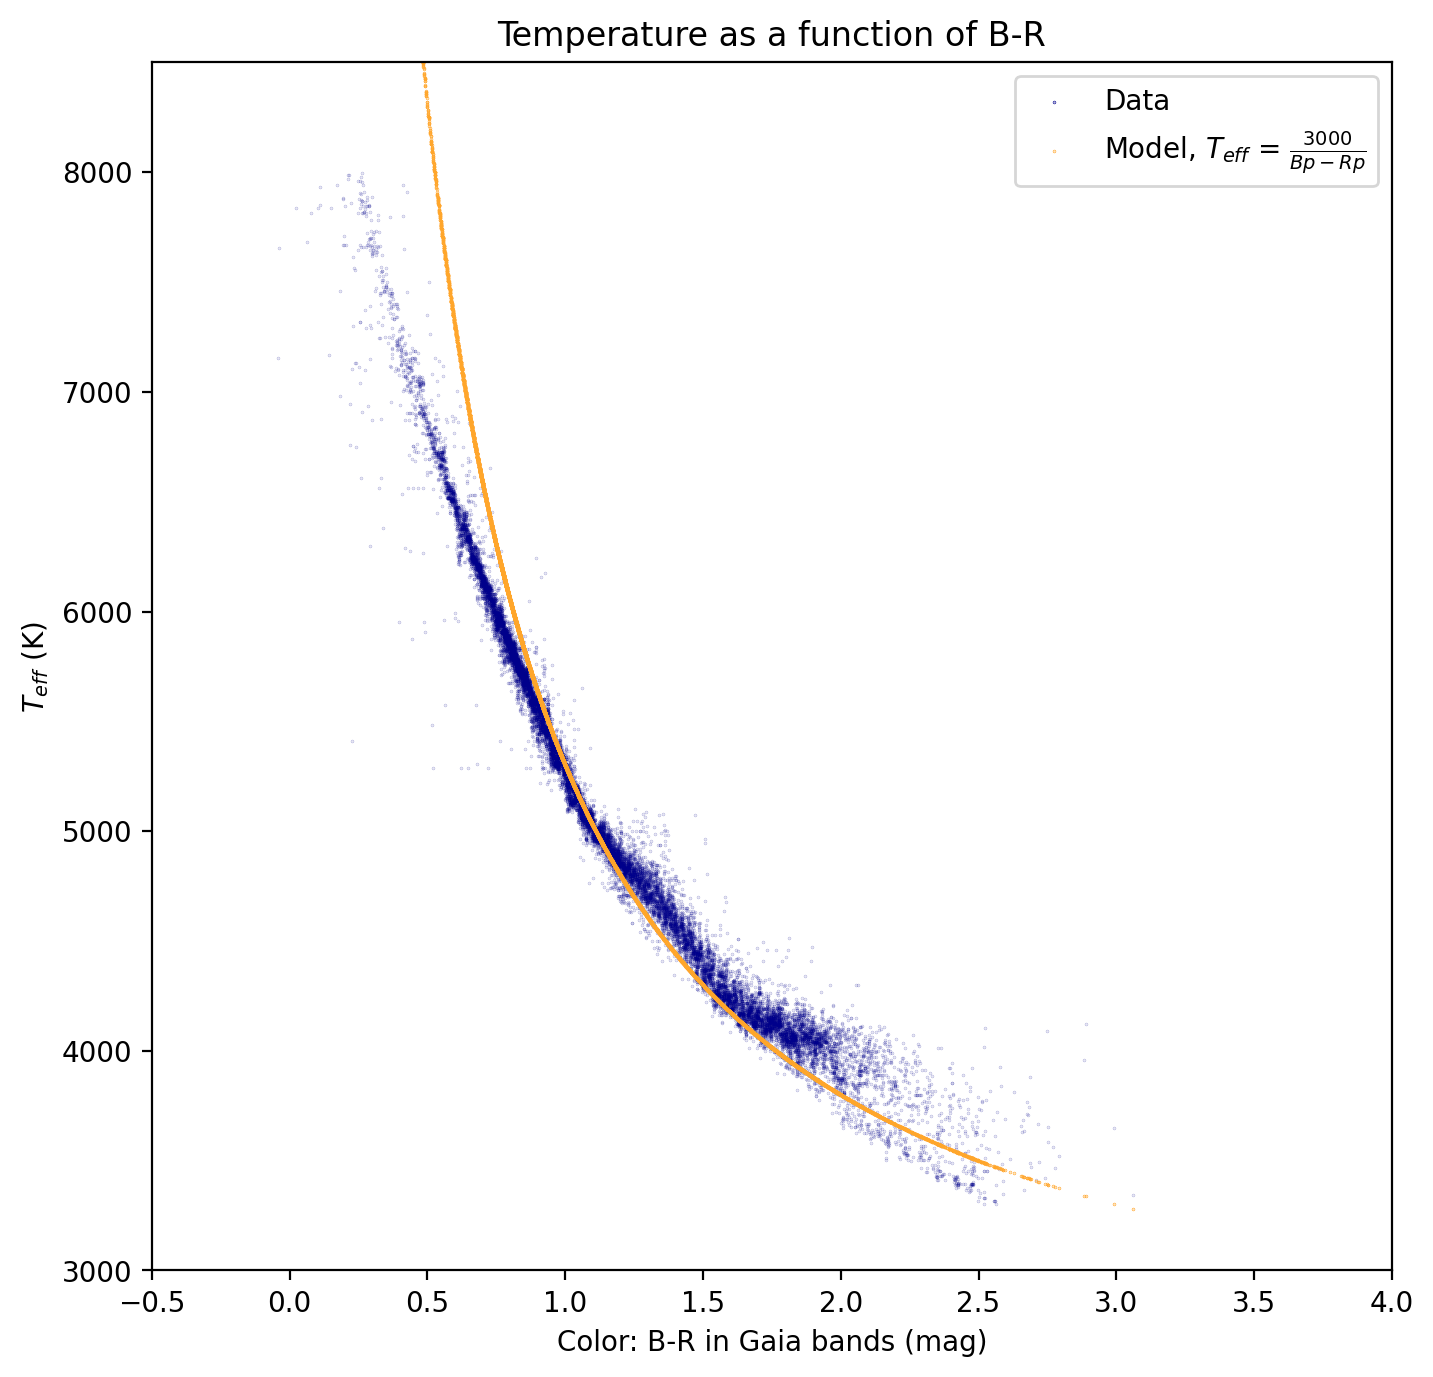

In [72]:
fig, ax = plt.subplots(figsize=(8,8), dpi=200)


plt.ylabel('$T_{eff}$ (K)')
plt.xlabel ('Color: B-R in Gaia bands (mag)')
plt.title ('Temperature as a function of B-R')

plt.scatter(BpRp, Teff, s=0.05, alpha = 0.3, color = 'darkblue', label = 'Data')
plt.scatter(BpRp, modelT+2300, s = 0.05, color = 'xkcd:mango', label = r'Model, $T_{eff}$ = $\frac{3000}{Bp-Rp}$')


plt.xlim(-0.5,4)
plt.ylim(3000,8500)
# plt.yscale('log')
lgnd = plt.legend()
for lh in lgnd.legendHandles:
    lh.set_alpha(1)
    lh.set_markersize=10
    

plt.savefig('Teff_BpRp.jpg', bbox_inches='tight')
plt.show()

In [73]:
#make a function that approximates the relationship between luminosity & magnitude
#initial guess: i know magnitudes are defined as m1-m2 = -log(Lum1/Lum2) 
model_Lum = 80*(2.5**(-Gmag)) 

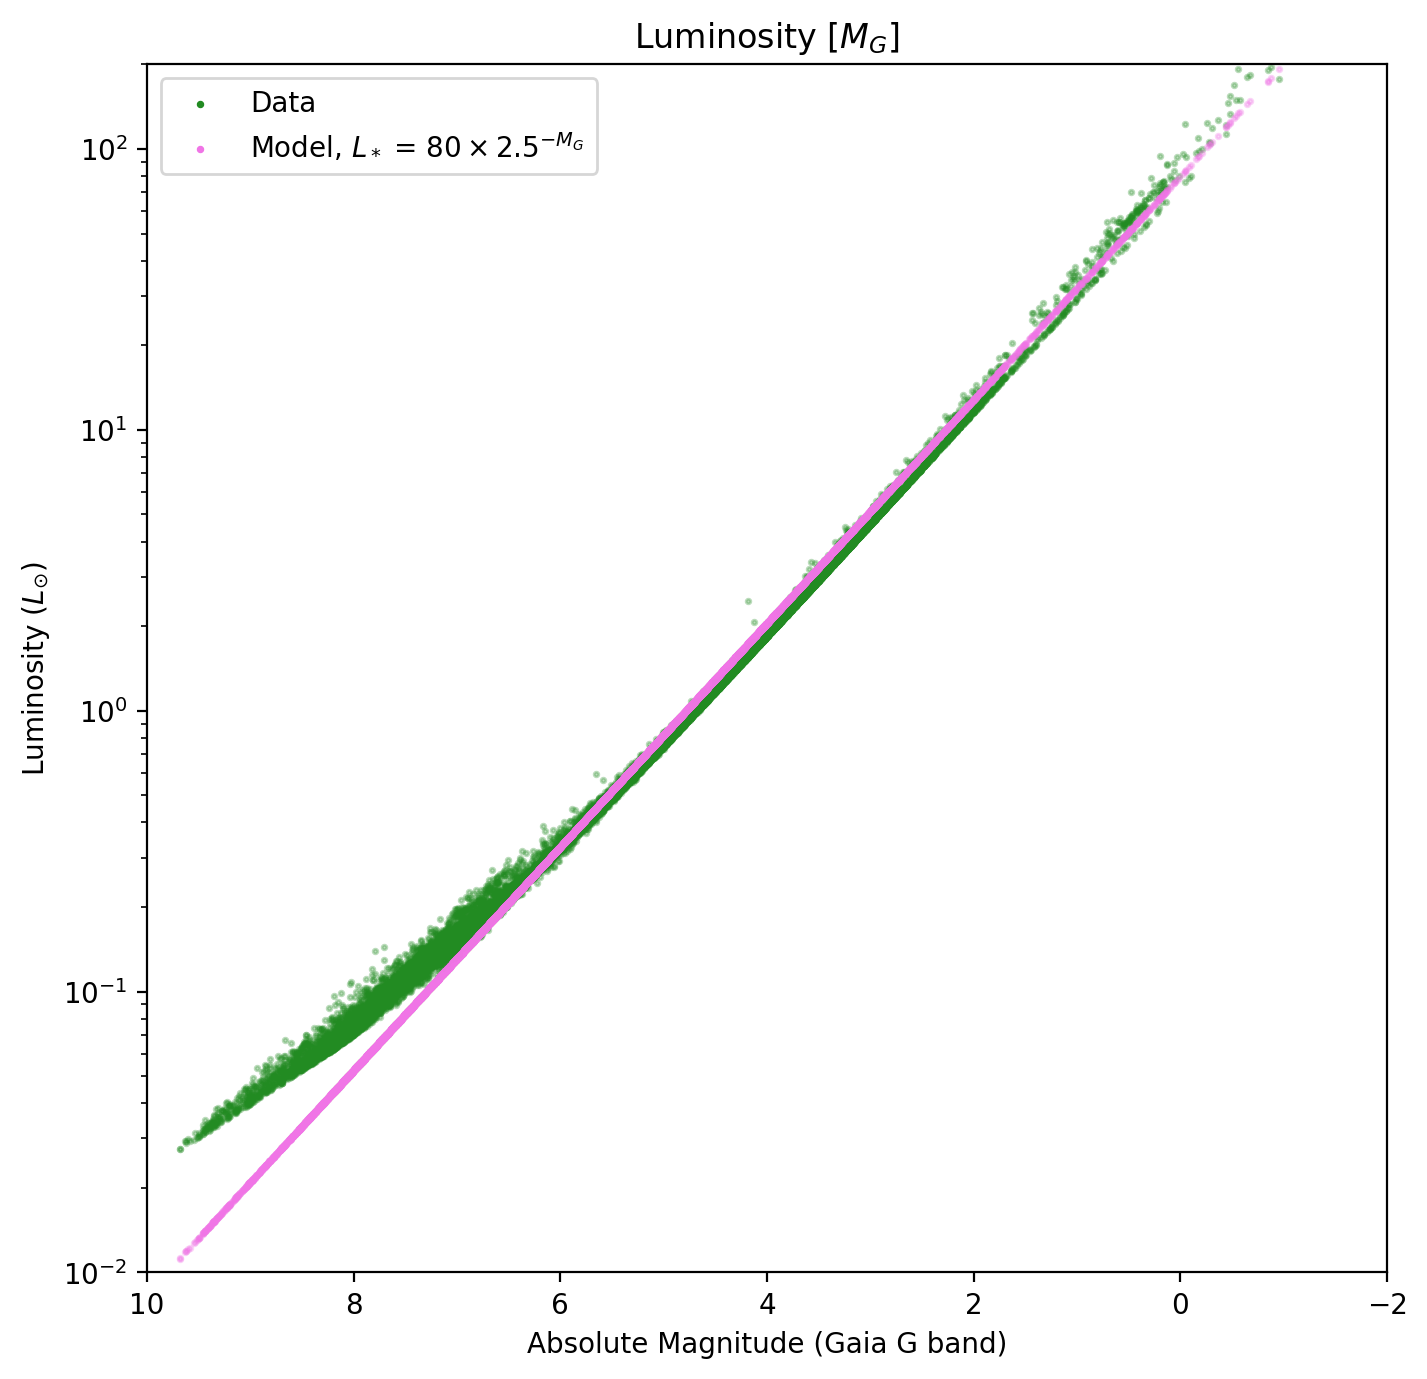

In [74]:
fig, ax = plt.subplots(figsize=(8,8), dpi=200)


plt.ylabel('Luminosity ($L_{\odot}$)')
plt.xlabel ('Absolute Magnitude (Gaia G band)')
plt.title ('Luminosity [$M_{G}$]')

plt.scatter(Gmag, lum, s= 2.8, alpha = 0.3, color = 'forestgreen', label = 'Data')
plt.scatter(Gmag, model_Lum, s= 2.8, alpha = 0.3, color = 'xkcd:purply pink', \
            label = r'Model, $L_*$ = $80 \times 2.5^{-M_G}$ ')

plt.yscale('log')

plt.xlim(10,-2)
# plt.ylim(1e-2, 1e3)
plt.ylim(1e-2, 200)


lgnd = plt.legend()
for lh in lgnd.legendHandles:
    lh.set_alpha(1)
    lh.set_markersize=10
    
    
plt.savefig('LumvsMg.jpg', bbox_inches='tight')
plt.show()

2 (b) Now using your equations from (a), use the fact that L ∝ R^2 x (T_eff)^4 to determine a relationship to convert BP−RP and M_G into radius. Write down the equation and plot the residuals between your estimated radius and the Gaia radius as a function of Gaia radius. 

For this plot, you might want to use a log scale for the radius. If everything worked out okay, the values should scatter around zero (roughly). If there is a bias (that is, if the residuals are systematically high/low for different radius values), briefly describe why you think your model is insufficient for those values.

In [75]:
#calculate an expression for R as a function of color (model for T) & mag (model for L)
#model_Lum is in solar units, and we want to get R in solar units, so have to factor that in
pi = np.pi
sigma = 5.67*(10**-8) # W/(square meters) x K^4
Lsun = 3.86 * (10**26) # W
Rsun = 6.96 * (10**8) #m
modelR = np.sqrt((model_Lum*Lsun)/(4*pi*(Rsun**2)*sigma*(modelT**4)))


residuals = R-modelR

In [76]:
print(np.min(residuals), np.max(residuals))

-109.33995611809084 8.578035252091485


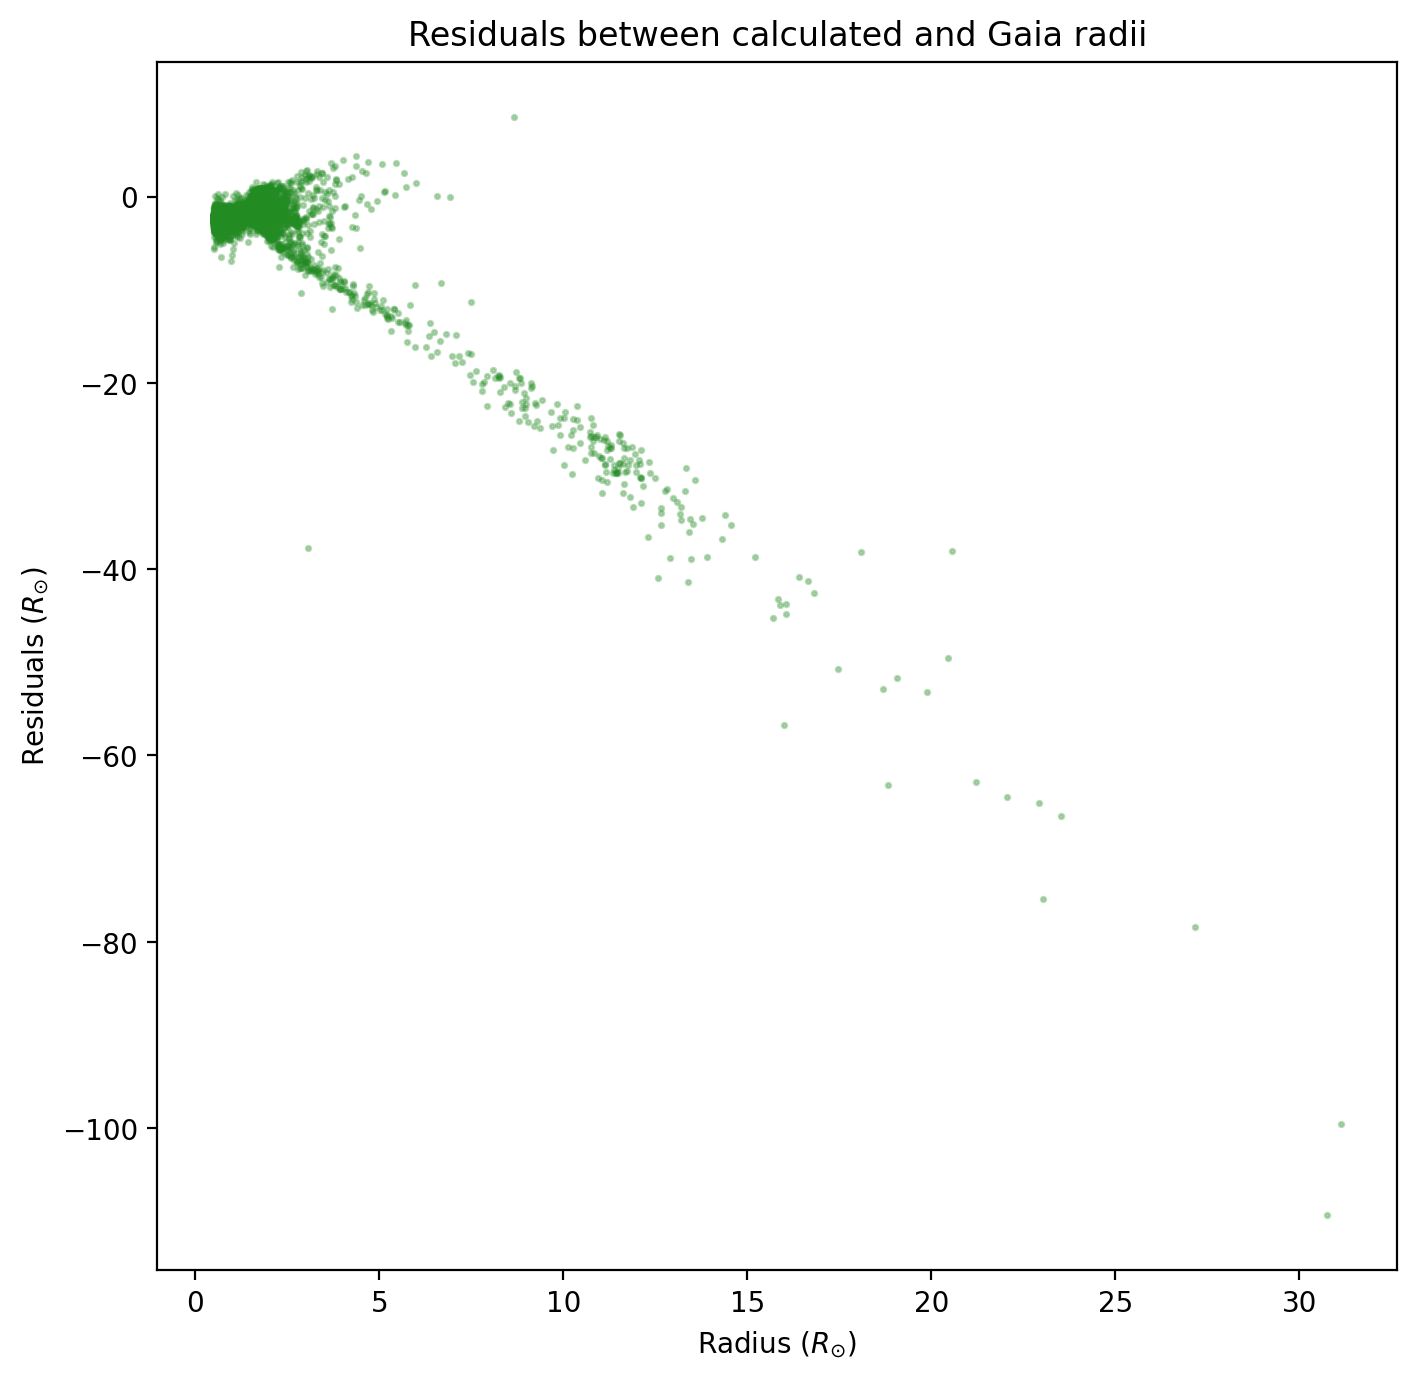

In [80]:
fig, ax = plt.subplots(figsize=(8,8), dpi=200)


# plt.ylabel('Luminosity ($L_{\odot}$)')
# plt.xlabel ('Absolute Magnitude (Gaia G band)')
# plt.title ('Luminosity [$M_{G}$]')

# plt.scatter(R, modelR, s= 2.8, alpha = 0.3, color = 'xkcd:mango', label = 'R as a function of B-R, $M_G$')
plt.scatter(R, residuals, s= 2.8, alpha = 0.3, color = 'forestgreen')


# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Radius ($R_{\odot}$)')
plt.ylabel('Residuals ($R_{\odot}$)')

plt.title('Residuals between calculated and Gaia radii')
# plt.xlim(-2,10)
# plt.ylim(-15, 15)

# plt.legend()

plt.savefig('RvsResiduals.jpg', bbox_inches='tight')
plt.show()

2 (c) Now make a CMD (BP −RP vs. MG) for this sample. Using your equation from (b), plot
lines corresponding to stars with radii of 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, and 300 solar radii.
Remark on why some stars are called “giants” and others “dwarfs.”

In [119]:
#to calculate radius lines, define a function:
def radLines (r, color, C):
    color = pd.Series.to_numpy(color)
    log = np.log
    term1 = -4*log(color)
    term2 = 2*log(r)
    term3 = log(C)
    log25 = log(2.5)
    
    terms_sum = term1+term2+term3
    
    change_base = terms_sum/log25
    
    mg = -(change_base)
    return mg

In [120]:
constant = (4*pi*(Rsun**2)*sigma*(3000**4))/(Lsun*80)

In [121]:
radLine_003 = radLines(0.03,BpRp,constant)
radLine_01 = radLines(0.1,BpRp,constant)
radLine_03 = radLines(0.3,BpRp,constant)
radLine_1 = radLines(1,BpRp,constant)
radLine_3 = radLines(3,BpRp,constant)
radLine_10 = radLines(10,BpRp,constant)
radLine_30 = radLines(30,BpRp,constant)
radLine_100 = radLines(100,BpRp,constant)
radLine_300 = radLines(300,BpRp,constant)

C:\Users\thumm\AppData\Local\Temp\ipykernel_18156\354706491.py:5: RuntimeWarning: invalid value encountered in log
  term1 = -4*log(color)


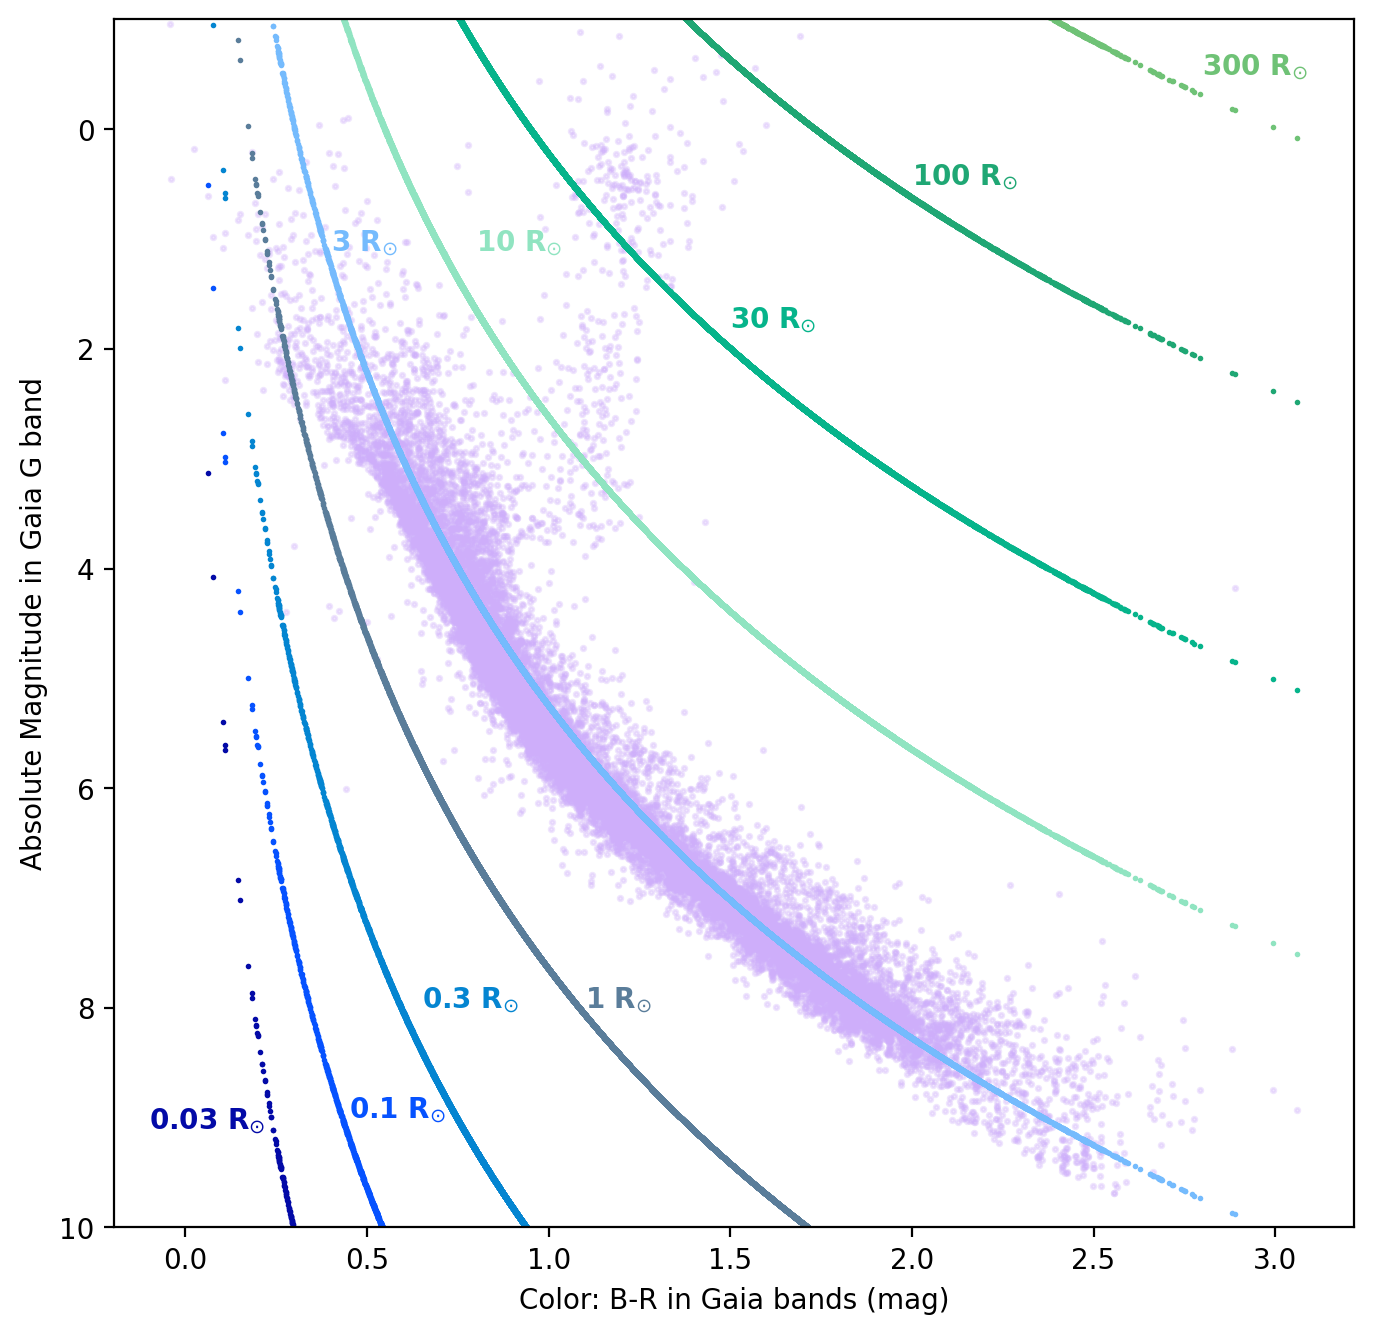

In [151]:
fig, ax = plt.subplots(figsize=(8,8), dpi=200)


# plt.ylabel('Luminosity ($L_{\odot}$)')
# plt.xlabel ('Absolute Magnitude (Gaia G band)')
# plt.title ('Luminosity [$M_{G}$]')

plt.scatter(BpRp, Gmag, s= 2.8, alpha = 0.3, color = 'xkcd:pale violet')

plt.scatter(BpRp, radLine_003, s=1, color = 'xkcd:cobalt blue', label = r'0.03 R$_{\odot}$')
plt.scatter(BpRp, radLine_01, s=1, color = 'xkcd:electric blue', label = r'0.1 R$_{\odot}$')
plt.scatter(BpRp, radLine_03, s=1, color = 'xkcd:cerulean', label = r'0.3 R$_{\odot}$')
plt.scatter(BpRp, radLine_1, s=1, color = 'xkcd:steel blue', label = r'1 R$_{\odot}$')
plt.scatter(BpRp, radLine_3, s=1, color = 'xkcd:sky blue', label = r'3 R$_{\odot}$')
plt.scatter(BpRp, radLine_10, s=1, color = 'xkcd:light teal', label = r'10 R$_{\odot}$')
plt.scatter(BpRp, radLine_30, s=1,  color = 'xkcd:green blue', label = r'30 R$_{\odot}$')
plt.scatter(BpRp, radLine_100, s=1, color = 'xkcd:jade', label = r'100 R$_{\odot}$')
plt.scatter(BpRp, radLine_300, s=1, color = 'xkcd:soft green', label = r'300 R$_{\odot}$')

ax.text(2.8,-0.5,r'300 R$_{\odot}$', color = 'xkcd:soft green', fontsize=10, fontweight='bold')
ax.text(2,0.5,r'100 R$_{\odot}$', color = 'xkcd:jade', fontsize=10, fontweight='bold')
ax.text(1.5,1.8,r'30 R$_{\odot}$', color = 'xkcd:green blue', fontsize=10, fontweight='bold')
ax.text(0.8,1.1,r'10 R$_{\odot}$', color = 'xkcd:light teal', fontsize=10, fontweight='bold')
ax.text(0.4,1.1,r'3 R$_{\odot}$', color = 'xkcd:sky blue', fontsize=10, fontweight='bold')
ax.text(1.1,8,r'1 R$_{\odot}$', color = 'xkcd:steel blue', fontsize=10, fontweight='bold')
ax.text(0.65,8,r'0.3 R$_{\odot}$', color = 'xkcd:cerulean', fontsize=10, fontweight='bold')
ax.text(0.45,9,r'0.1 R$_{\odot}$', color = 'xkcd:electric blue', fontsize=10, fontweight='bold')
ax.text(-0.1,9.1,r'0.03 R$_{\odot}$', color = 'xkcd:cobalt blue', fontsize=10, fontweight='bold')


# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Color: B-R in Gaia bands (mag)')
plt.ylabel('Absolute Magnitude in Gaia G band')


plt.ylim(10, -1)

# lgnd = plt.legend()
# for lh in lgnd.legendHandles:
#     lh.set_alpha(1)
#     lh.set_markersize=10
    
    
plt.savefig('CMD.jpg', bbox_inches='tight')
plt.show()